# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_WutheringWaves_1.csv")
df.head()

,userName,score,at,content
0,ahhafcosh Cosh,5,2024-05-23 00:45:10,Wkwkwkw kemare masuk notiv hahaha
1,Brandall Nime,5,2024-05-23 00:43:31,Ini saatnya 🥰🥰
2,Luthfy Fachrul imam,1,2024-05-23 00:40:16,Why not support Language Indonesian? Your game...
3,Dinara Safira,5,2024-05-23 00:37:26,"Dear developer, semoga game ini tidak kikir se..."
4,AlgesIrsa,5,2024-05-23 00:37:12,Panjang panjang gem baik


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Wkwkwkw kemare masuk notiv hahaha,ahhafcosh Cosh,2024-05-23 00:45:10
1,Ini saatnya 🥰🥰,Brandall Nime,2024-05-23 00:43:31
2,Why not support Language Indonesian? Your game...,Luthfy Fachrul imam,2024-05-23 00:40:16
3,"Dear developer, semoga game ini tidak kikir se...",Dinara Safira,2024-05-23 00:37:26
4,Panjang panjang gem baik,AlgesIrsa,2024-05-23 00:37:12
...,...,...,...
1388,Semoga tidak mengecewakan,Moh Rahmadani,2024-05-21 16:41:54
1389,Tolong tambah kan bahasa Indonesia,mrifai mrifai,2024-05-21 16:39:44
1390,Kalok Bosen maen/dh pensi genshin kesini aja bang,Raychal Avansha,2024-05-21 16:36:13
1391,Now force cloce my device bos..,Rai Ya,2024-05-21 16:35:11


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   1393 non-null   object
 1   userName  1393 non-null   object
 2   at        1393 non-null   object
dtypes: object(3)
memory usage: 32.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,1393,1393,1393
unique,1313,1388,1382
top,Game baik,Kusuma,2024-05-23 00:13:26
freq,15,2,2


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(1393, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(1313, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,wkwkwkw kemare masuk notiv hahaha,ahhafcosh Cosh,2024-05-23 00:45:10
1,ini saatnya,Brandall Nime,2024-05-23 00:43:31
2,why not support language indonesian your game ...,Luthfy Fachrul imam,2024-05-23 00:40:16
3,dear developer semoga game ini tidak kikir sep...,Dinara Safira,2024-05-23 00:37:26
4,panjang panjang gem baik,AlgesIrsa,2024-05-23 00:37:12
...,...,...,...
1388,semoga tidak mengecewakan,Moh Rahmadani,2024-05-21 16:41:54
1389,tolong tambah kan bahasa indonesia,mrifai mrifai,2024-05-21 16:39:44
1390,kalok bosen maendh pensi genshin kesini aja bang,Raychal Avansha,2024-05-21 16:36:13
1391,now force cloce my device bos,Rai Ya,2024-05-21 16:35:11


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,wkwkwkw kemare masuk notiv hahaha,ahhafcosh Cosh,2024-05-23 00:45:10
1,ini saatnya,Brandall Nime,2024-05-23 00:43:31
2,why not support language indonesian your game ...,Luthfy Fachrul imam,2024-05-23 00:40:16
3,dear developer semoga game ini tidak kikir sep...,Dinara Safira,2024-05-23 00:37:26
4,panjang panjang gem baik,AlgesIrsa,2024-05-23 00:37:12
...,...,...,...
1388,semoga tidak mengecewakan,Moh Rahmadani,2024-05-21 16:41:54
1389,tolong tambah kan bahasa indonesia,mrifai mrifai,2024-05-21 16:39:44
1390,kalok bosen maendh pensi genshin kesini aja bang,Raychal Avansha,2024-05-21 16:36:13
1391,now force cloce my device bos,Rai Ya,2024-05-21 16:35:11


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,wkwkwkw kemare masuk notiv hahaha,ahhafcosh Cosh,2024-05-23 00:45:10
1,saatnya,Brandall Nime,2024-05-23 00:43:31
2,why not support language indonesian your game ...,Luthfy Fachrul imam,2024-05-23 00:40:16
3,dear developer semoga game tidak kikir game se...,Dinara Safira,2024-05-23 00:37:26
4,panjang panjang gem baik,AlgesIrsa,2024-05-23 00:37:12
...,...,...,...
1388,semoga mengecewakan,Moh Rahmadani,2024-05-21 16:41:54
1389,tambah kan bahasa indonesia,mrifai mrifai,2024-05-21 16:39:44
1390,kalok bosen maendh pensi genshin kesini aja bang,Raychal Avansha,2024-05-21 16:36:13
1391,now force cloce my device bos,Rai Ya,2024-05-21 16:35:11


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                 [wkwkwkw, kemare, masuk, notiv, hahaha]
1                                               [saatnya]
2       [why, not, support, language, indonesian, your...
3       [dear, developer, semoga, game, tidak, kikir, ...
4                           [panjang, panjang, gem, baik]
                              ...                        
1388                               [semoga, mengecewakan]
1389                     [tambah, kan, bahasa, indonesia]
1390    [kalok, bosen, maendh, pensi, genshin, kesini,...
1391                 [now, force, cloce, my, device, bos]
1392                                           [semangat]
Name: content, Length: 1313, dtype: object

In [20]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_WutheringWaves_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_WutheringWaves_1.csv', encoding = 'latin1')
df_clean

,content
0,wkwkwkw kemarin masuk notiv hahaha
1,saat
2,why not support language indonesian your game ...
3,dear developer moga game kikir game belah graf...
4,panjang panjang gem baik
...,...
1308,moga kecewa
1309,tambah kan bahasa indonesia
1310,kalok bosen maendh pensi genshin kesini aja bang
1311,now force cloce my device bos


# **Translate**

In [22]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [23]:
# import pandas as pd
# from easynmt import EasyNMT

In [24]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_WutheringWaves_1.csv', encoding='latin1')

In [25]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [26]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [27]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [28]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_WutheringWaves_1.csv')

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_WutheringWaves_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,wkwkwkw kemarin masuk notiv hahaha,Yesterday's wkwkwkw entered notiv hahaha
1,1,saat,when
2,2,why not support language indonesian your game ...,Why not support language in Indonesia your gam...
3,3,dear developer moga game kikir game belah graf...,Dear developer Moga games. The game file split...
4,4,panjang panjang gem baik,length Gem good length
...,...,...,...
1308,1308,moga kecewa,Let's hope you're disappointed.
1309,1309,tambah kan bahasa indonesia,add English
1310,1310,kalok bosen maendh pensi genshin kesini aja bang,"fontcolor="" # FFFF00""ifbosenmaendhpensi genshi..."
1311,1311,now force cloce my device bos,now force close my device boss


# **Labeling**

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_WutheringWaves_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,wkwkwkw kemarin masuk notiv hahaha,Yesterday's wkwkwkw entered notiv hahaha
1,1,saat,when
2,2,why not support language indonesian your game ...,Why not support language in Indonesia your gam...
3,3,dear developer moga game kikir game belah graf...,Dear developer Moga games. The game file split...
4,4,panjang panjang gem baik,length Gem good length
...,...,...,...
1308,1308,moga kecewa,Let's hope you're disappointed.
1309,1309,tambah kan bahasa indonesia,add English
1310,1310,kalok bosen maendh pensi genshin kesini aja bang,"fontcolor="" # FFFF00""ifbosenmaendhpensi genshi..."
1311,1311,now force cloce my device bos,now force close my device boss


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 513
Netral = 568
Negatif = 232

Total Data Seluruhnya : 1313


In [34]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,wkwkwkw kemarin masuk notiv hahaha,Yesterday's wkwkwkw entered notiv hahaha,Positif
1,1,saat,when,Netral
2,2,why not support language indonesian your game ...,Why not support language in Indonesia your gam...,Positif
3,3,dear developer moga game kikir game belah graf...,Dear developer Moga games. The game file split...,Positif
4,4,panjang panjang gem baik,length Gem good length,Positif
...,...,...,...,...
1308,1308,moga kecewa,Let's hope you're disappointed.,Negatif
1309,1309,tambah kan bahasa indonesia,add English,Netral
1310,1310,kalok bosen maendh pensi genshin kesini aja bang,"fontcolor="" # FFFF00""ifbosenmaendhpensi genshi...",Netral
1311,1311,now force cloce my device bos,now force close my device boss,Netral


In [35]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,wkwkwkw kemarin masuk notiv hahaha,Yesterday's wkwkwkw entered notiv hahaha,Positif
1,saat,when,Netral
2,why not support language indonesian your game ...,Why not support language in Indonesia your gam...,Positif
3,dear developer moga game kikir game belah graf...,Dear developer Moga games. The game file split...,Positif
4,panjang panjang gem baik,length Gem good length,Positif
...,...,...,...
1308,moga kecewa,Let's hope you're disappointed.,Negatif
1309,tambah kan bahasa indonesia,add English,Netral
1310,kalok bosen maendh pensi genshin kesini aja bang,"fontcolor="" # FFFF00""ifbosenmaendhpensi genshi...",Netral
1311,now force cloce my device bos,now force close my device boss,Netral


# **Visualisasi**


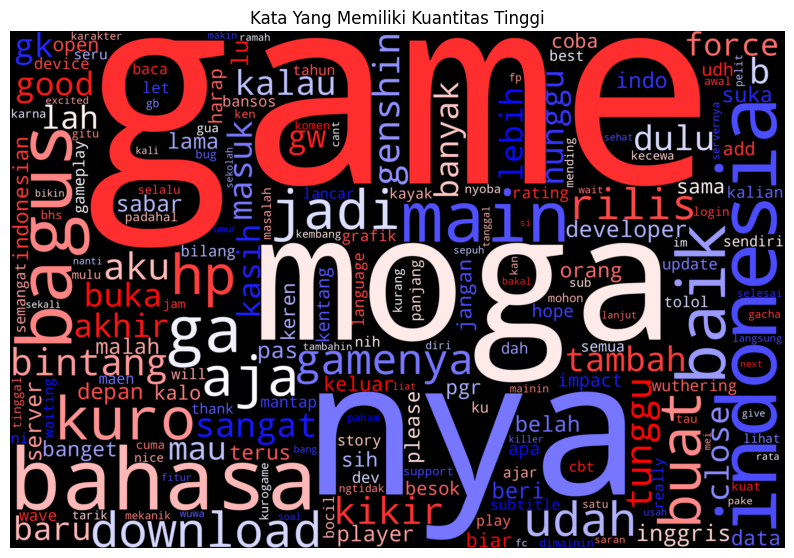

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


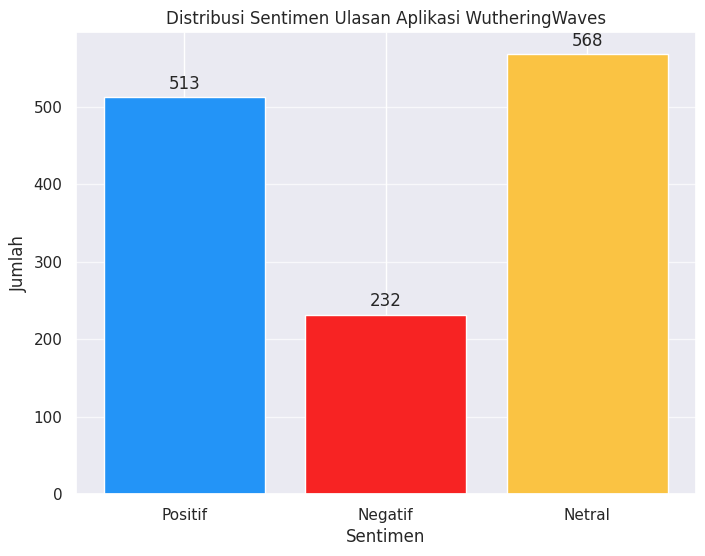

In [38]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi WutheringWaves")


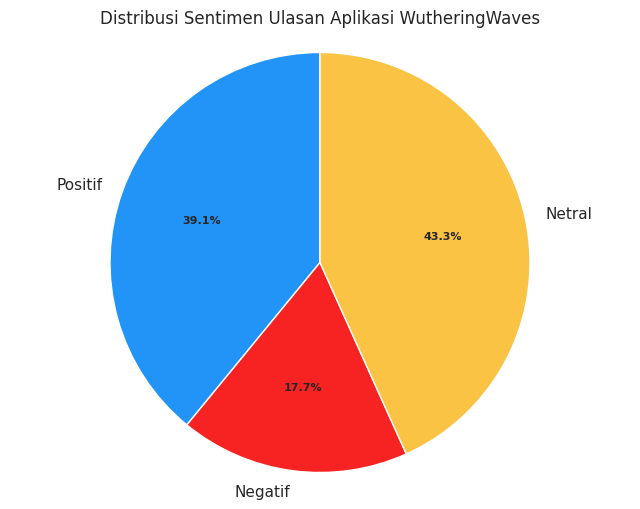

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi WutheringWaves")

In [40]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,wkwkwkw kemarin masuk notiv hahaha,Yesterday's wkwkwkw entered notiv hahaha,Positif
2,why not support language indonesian your game ...,Why not support language in Indonesia your gam...,Positif
3,dear developer moga game kikir game belah graf...,Dear developer Moga games. The game file split...,Positif
4,panjang panjang gem baik,length Gem good length,Positif
5,bagus gameplay nya lihat seru senang aku sedan...,"Nice game play. Look, it's great. I'm waiting ...",Positif
...,...,...,...
1300,tambah bahasa indonesiatolong lah tambahkansay...,Add English please add me very play your work ...,Positif
1301,game nya force close mulu kali masuk game lang...,It's a close-up game. It's a live-force close ...,Negatif
1303,idk why baru download masuk apl sekali abis ga...,idk why has just downloaded in apl once ibis c...,Negatif
1305,moga bakal betah main moga lancar banyak bug,Let's hope it'll be good to play. A lot of bugs.,Positif


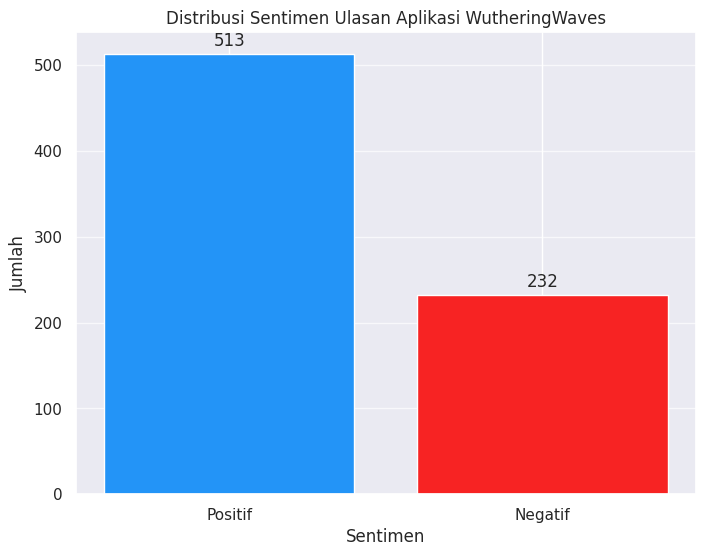

In [41]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi WutheringWaves")


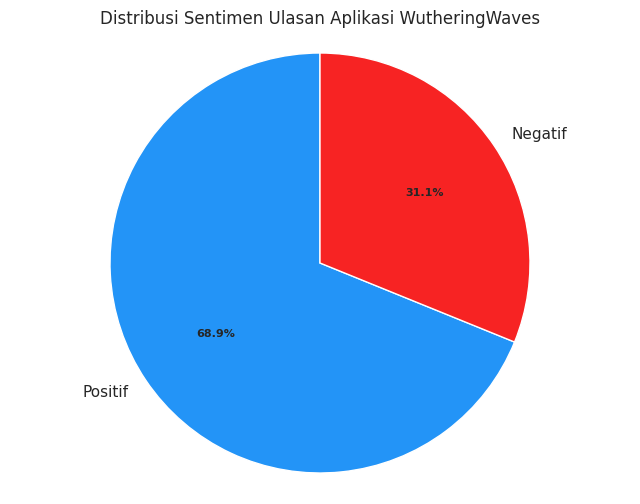

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi WutheringWaves")

In [43]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,wkwkwkw kemarin masuk notiv hahaha,Yesterday's wkwkwkw entered notiv hahaha,1
2,why not support language indonesian your game ...,Why not support language in Indonesia your gam...,1
3,dear developer moga game kikir game belah graf...,Dear developer Moga games. The game file split...,1
4,panjang panjang gem baik,length Gem good length,1
5,bagus gameplay nya lihat seru senang aku sedan...,"Nice game play. Look, it's great. I'm waiting ...",1
...,...,...,...
1300,tambah bahasa indonesiatolong lah tambahkansay...,Add English please add me very play your work ...,1
1301,game nya force close mulu kali masuk game lang...,It's a close-up game. It's a live-force close ...,0
1303,idk why baru download masuk apl sekali abis ga...,idk why has just downloaded in apl once ibis c...,0
1305,moga bakal betah main moga lancar banyak bug,Let's hope it'll be good to play. A lot of bugs.,1


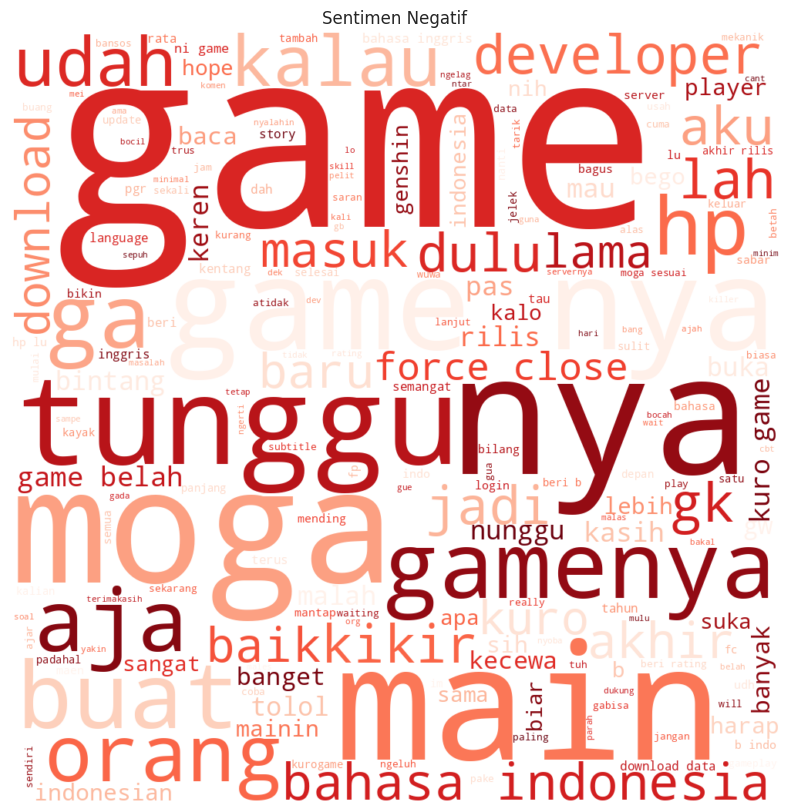

In [44]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

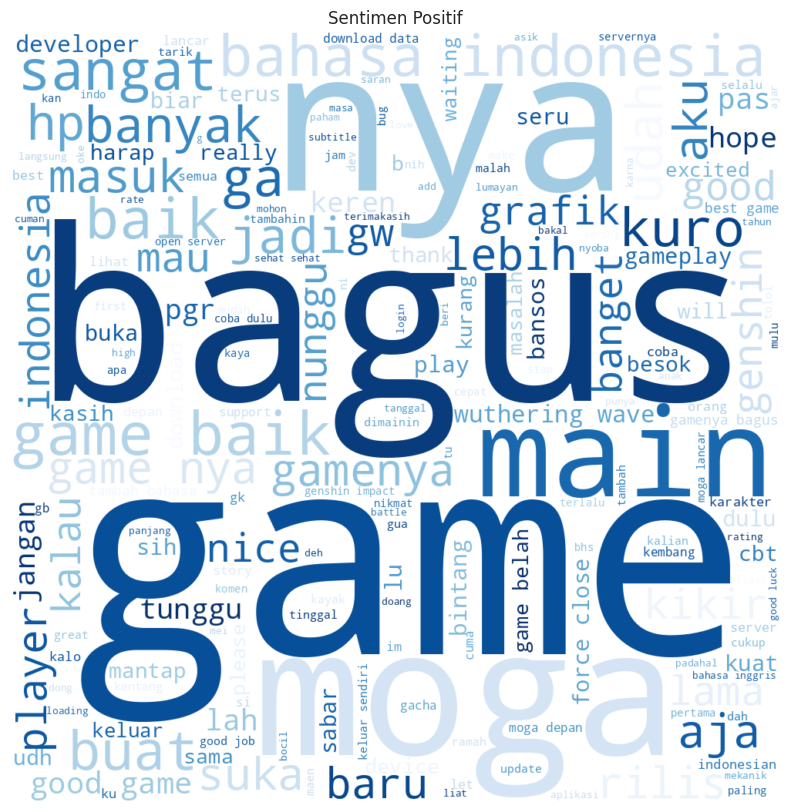

In [45]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [46]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    513
0    232
Name: count, dtype: int64

# **Data Preparation & Modeling**

In [100]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [101]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [102]:
X_train

72                     terima kasih ww gensin jadi baik v
116                  uts actually great for a mobile game
274     gamenya bagusscuma buat ga jago bahasa inggris...
1176                               otw b bahasa indonesia
452                      gamenya sangat bagus sangat suka
                              ...                        
118               gamenya bagus moga depan sedia sub indo
175     adil adik males baca open server open nya mei ...
468     sistem combat bagus free to play friendly desa...
761                                          very amazing
168                              moga kuat device kentang
Name: content, Length: 596, dtype: object

In [103]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)


TfidfVectorizer()

In [104]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [105]:
X_train_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [106]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.6375838926174496
Akurasi untuk c = 0.05: 0.6577181208053692
Akurasi untuk c = 0.25: 0.7516778523489933
Akurasi untuk c = 0.5: 0.7986577181208053
Akurasi untuk c = 0.75: 0.8120805369127517
Akurasi untuk c = 1: 0.8120805369127517


In [107]:
linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [108]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.8120805369127517 


In [109]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.81
[[35 19]
 [ 9 86]]
              precision    recall  f1-score   support

           0       0.80      0.65      0.71        54
           1       0.82      0.91      0.86        95

    accuracy                           0.81       149
   macro avg       0.81      0.78      0.79       149
weighted avg       0.81      0.81      0.81       149



In [110]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[35 19]
 [ 9 86]]

True Positives (TP) =  35

True Negatives (TN) =  86

False Positives (FP) =  19

False Negatives (FN) =  9

Accuracy =  0.8120805369127517


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

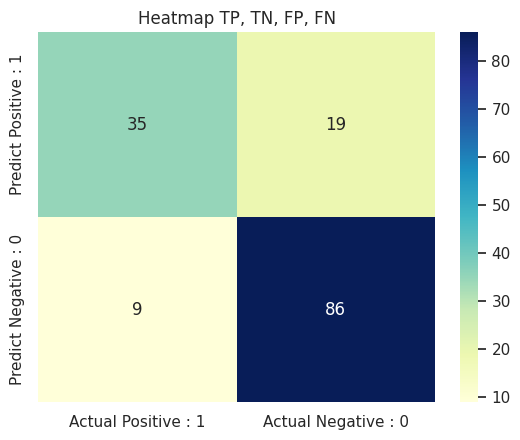

In [111]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive : 1', 'Actual Negative : 0'],
                                 index=['Predict Positive : 1', 'Predict Negative : 0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [112]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [113]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8121


In [114]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1879


# **Testing**


In [129]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text = preprocess_text(new_text)
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : bagus bgt , suka sekali sama jalan ceritanya
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 74.31%
Probabilitas: 74.31044760660112 %


In [128]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text = preprocess_text(new_text)
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : jelek bgt, kecewa sering force close
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 87.41%
Probabilitas: 87.40959179460963 %
